In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

>1. Generate 50 2D-data points
>2. Add Gaussian random noise to the data
>3. Show the original curve line and the noisy data.

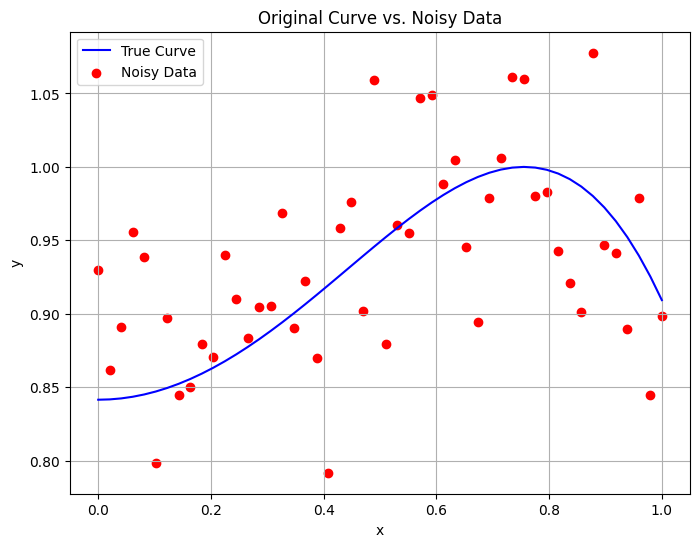

In [8]:

# Define the true function y = sin(x^2 + 1)
def true_function(x):
    return np.sin(x**2 + 1)

# Generate 50 2D data points with Gaussian noise
np.random.seed(0)  # Set a seed for reproducibility
num_points = 50
x_data = np.linspace(0,1,num_points)
y_true = true_function(x_data)
sigma = 0.05
y_noisy = y_true + np.random.normal(0, sigma, num_points)

# Plot the original curve and the noisy data
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_true, 'b-', label='True Curve')
plt.scatter(x_data, y_noisy, c='r', marker='o', label='Noisy Data')
plt.title('Original Curve vs. Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

>4. Fit the generated noisy data using the MAP as discussed in class.
>5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.
>6. Display the estimated values of w

In [9]:
# Define the polynomial basis function
def polynomial_basis(x, M):
    return np.array([x**i for i in range(M + 1)])

# Define the MAP objective function
def MAP_fitting(x, y, M, alpha):
    px = np.zeros([N, M+1])
    t_ = np.zeros([N, 1])

    for n in range(N):
        px[n] = polynomial_basis(x[n], M)
        t_[n] = y[n]

    identity = np.identity(M+1)
    xx = np.dot(px.T, px) + (alpha/beta)*identity
    xx_inverse = linalg.pinv(xx)
    k = np.dot(xx_inverse, px.T)
    w = np.dot(k, t_)
    w = np.squeeze(w)
    return w, px

M = 5
N = len(x_data)
alpha = 0.4
sigma2 = sigma**2
beta = 1/sigma2
w,px = MAP_fitting(x_data,y_noisy,M,alpha)
y_fitted = px.dot(w)

total_absolute_error = np.sum(np.abs(y_noisy - y_fitted))
print(f'The total absolute Error value = {total_absolute_error}')
print(f'w = {w}')


The total absolute Error value = 2.0180531802302513
w = [ 0.90143256 -0.24369795  0.88318061 -0.13397875 -0.48197351 -0.05053081]


>7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show thevalues of M and alpha

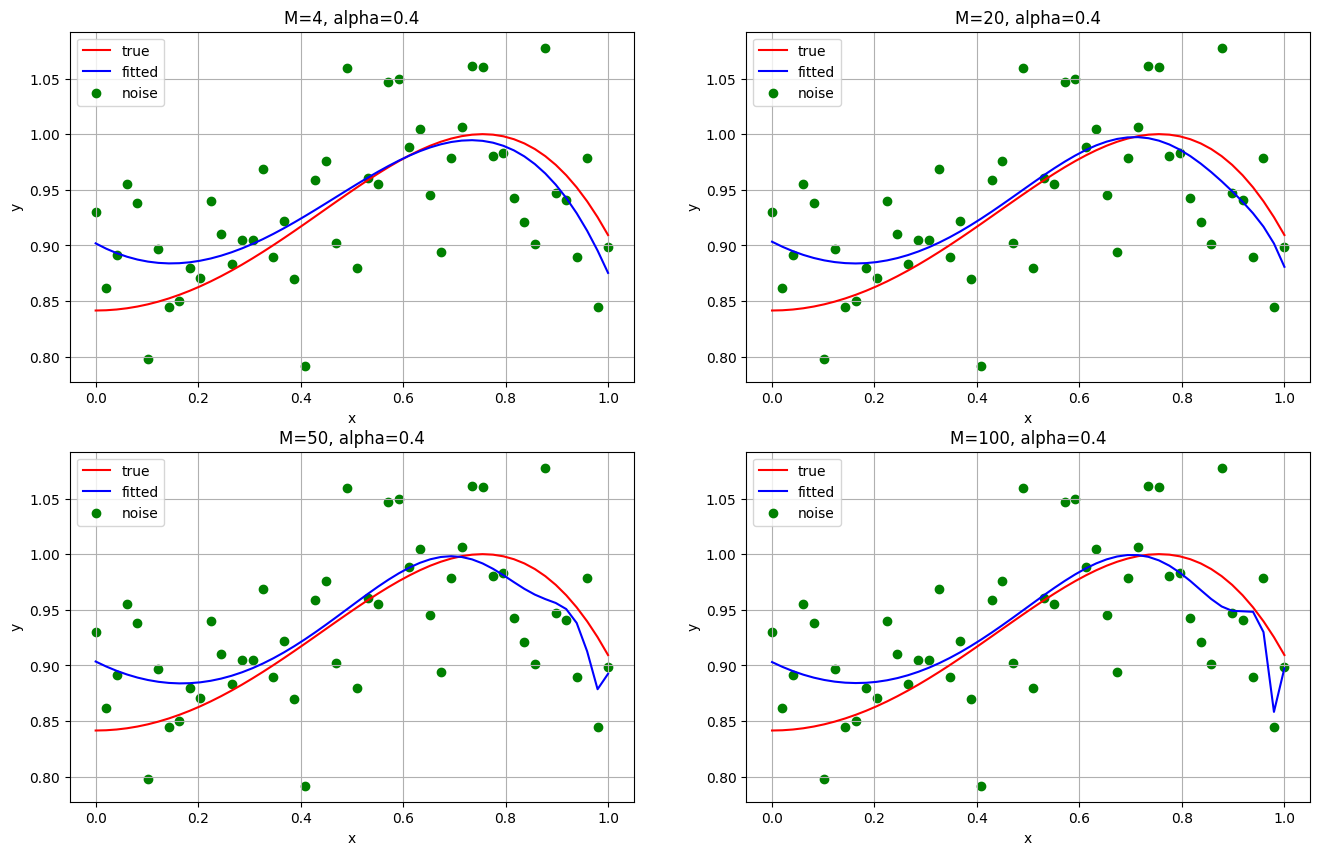

In [10]:
plt.figure(figsize=(16, 10))
M_=[4,20,50,100]
alpha = 0.4

for i, M in enumerate(M_):
    w,px = MAP_fitting(x_data,y_noisy,M,alpha)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M}, alpha={alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)


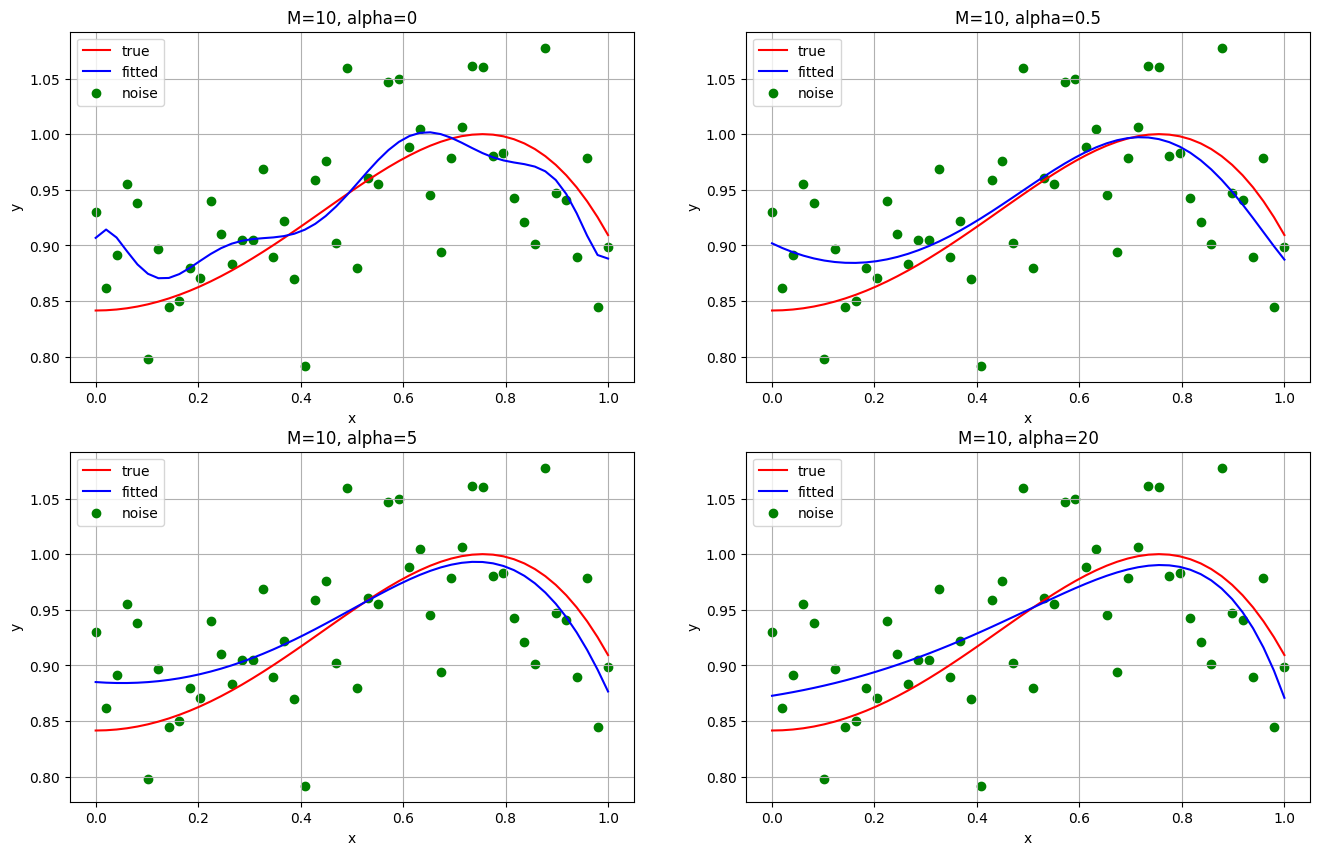

In [11]:
plt.figure(figsize=(16, 10))
M = 10
alpha_ = [0,.5,5,20] 

for i, alpha in enumerate(alpha_):
    w,px = MAP_fitting(x_data,y_noisy,M,alpha)
    y_fitted = px.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M}, alpha={alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

>8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

### Ans:


Polynomial Degree (M):

- Increasing M: 

Increasing the degree of the polynomial (M) allows the model to fit the training data more closely, potentially capturing complex patterns in the data. However, as M increases, the model becomes more flexible and can start to fit the noise in the data, leading to overfitting. Overfitting occurs when the model is too complex and performs well on the training data but generalizes poorly to new, unseen data. Therefore, a very high M can lead to poor fitting accuracy on new data.

- Decreasing M:

Reducing the degree of the polynomial simplifies the model and makes it less prone to overfitting. However, if M is too low, the model may underfit the data, meaning it fails to capture important patterns and has poor fitting accuracy on both the training and test data.
In practice, it's essential to strike a balance by choosing an appropriate value of M that captures the underlying trends in the data without overfitting. This often requires experimentation and may involve techniques like cross-validation.

Regularization Coefficient (Alpha):

- Increasing Alpha:

A higher value of the regularization coefficient (alpha) imposes a stronger penalty on the model's complexity. This encourages the model to have smaller parameter values (coefficients), effectively simplifying the model. Regularization helps prevent overfitting by discouraging the model from fitting the noise in the data. Therefore, increasing alpha can improve fitting accuracy on new data, especially when the model is complex (high M).

- Decreasing Alpha:

Lower values of alpha allow the model to have larger parameter values, potentially leading to a more complex model. While lower alpha values may result in better fitting accuracy on the training data, they are more prone to overfitting, especially when M is high. The model may fit the training data very closely but generalize poorly to new data.
The choice of alpha should also be made carefully, considering the trade-off between fitting the training data and preventing overfitting. Cross-validation or other validation techniques can help determine an appropriate value of alpha.